## The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing numerous passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. In this, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# Problem Statement : Build Various Classification Models and Suggest the best Model based on Accuracy of Results on the Titanic Dataset

### 1.Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv.txt')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2.Removing the unnecessary columns:

In [7]:
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,NaN,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### 3.Treating the Null Values

In [12]:
df['Age']=df['Age'].fillna(value=df['Age'].median())

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [14]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [15]:
df['Embarked']=df['Embarked'].fillna('S')

In [16]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Thus all null values have been treated successfully.

### 4.Treating Outliers

In [17]:
IQR_age = df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
Upper_OutlierLimit_age = df['Age'].quantile(0.75) + 1.5*IQR_age
Lower_OutlierLimit_age = df['Age'].quantile(0.25) - 1.5*IQR_age
OutlierValues_age = df[(df['Age']>=Upper_OutlierLimit_age) | (df['Age']<=Lower_OutlierLimit_age)]

In [18]:
for i in range(0,891):
    if df['Age'][i] >= Upper_OutlierLimit_age:
        df['Age'][i] = Upper_OutlierLimit_age
    elif df['Age'][i] <= Lower_OutlierLimit_age:
        df['Age'][i] = Lower_OutlierLimit_age
    else:     
        continue

C:\Users\Rohaan\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Rohaan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


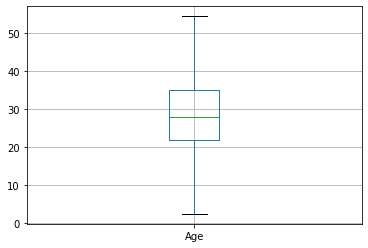

In [19]:
df.boxplot(column=['Age'])

In [20]:
IQR_fare= df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25)
Upper_OutlierLimit_fare = df['Fare'].quantile(0.75) + 1.5*IQR_fare
Lower_OutlierLimit_fare = df['Fare'].quantile(0.25) - 1.5*IQR_fare
OutlierValues_fare = df[(df['Fare']>=Upper_OutlierLimit_fare) | (df['Fare']<=Lower_OutlierLimit_fare)]

In [21]:
for i in range(0,891):
    if df['Fare'][i] >= Upper_OutlierLimit_fare:
        df['Fare'][i] = Upper_OutlierLimit_fare
    elif df['Fare'][i] <= Lower_OutlierLimit_fare:
        df['Fare'][i] = Lower_OutlierLimit_fare
    else:     
        continue

C:\Users\Rohaan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


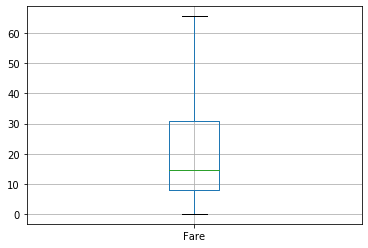

In [22]:
df.boxplot(column=['Fare'])

In [23]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6344,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### 5.Converting features and creating Dummy Variables

In [24]:
df['Fare'] = df['Fare'].astype(int)

In [25]:
obj = df.dtypes == np.object
df.columns[obj]
dummydf = pd.DataFrame()

for i in df.columns[obj]:
    dummy=pd.get_dummies(df[i],drop_first=True)
    dummydf=pd.concat([dummydf, dummy], axis=1)
    
df1=pd.concat([df,dummydf],axis=1)
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7,S,1,0,1
1,1,1,female,38.0,1,0,65,C,0,0,0
2,1,3,female,26.0,0,0,7,S,0,0,1
3,1,1,female,35.0,1,0,53,S,0,0,1
4,0,3,male,35.0,0,0,8,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13,S,1,0,1
887,1,1,female,19.0,0,0,30,S,0,0,1
888,0,3,female,28.0,1,2,23,S,0,0,1
889,1,1,male,26.0,0,0,30,C,1,0,0


In [26]:
df1.drop('Sex', axis=1, inplace=True)
df1.drop('Embarked', axis=1, inplace=True)

In [27]:
df1['Age'] = df1['Age'].astype(int)

In [28]:
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22,1,0,7,1,0,1
1,1,1,38,1,0,65,0,0,0
2,1,3,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,1
4,0,3,35,0,0,8,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13,1,0,1
887,1,1,19,0,0,30,0,0,1
888,0,3,28,1,2,23,0,0,1
889,1,1,26,0,0,30,1,0,0


In [29]:
df1['Relatives']=df1['SibSp']+df1['Parch']

In [30]:
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Relatives
0,0,3,22,1,0,7,1,0,1,1
1,1,1,38,1,0,65,0,0,0,1
2,1,3,26,0,0,7,0,0,1,0
3,1,1,35,1,0,53,0,0,1,1
4,0,3,35,0,0,8,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13,1,0,1,0
887,1,1,19,0,0,30,0,0,1,0
888,0,3,28,1,2,23,0,0,1,3
889,1,1,26,0,0,30,1,0,0,0


In [31]:
df1.drop('SibSp', axis=1, inplace=True)
df1.drop('Parch', axis=1, inplace=True)
df1

,Survived,Pclass,Age,Fare,male,Q,S,Relatives
0,0,3,22,7,1,0,1,1
1,1,1,38,65,0,0,0,1
2,1,3,26,7,0,0,1,0
3,1,1,35,53,0,0,1,1
4,0,3,35,8,1,0,1,0
...,...,...,...,...,...,...,...,...
886,0,2,27,13,1,0,1,0
887,1,1,19,30,0,0,1,0
888,0,3,28,23,0,0,1,3
889,1,1,26,30,1,0,0,0


In [32]:
for i in range(0,891):
    if (df1['Age'][i]<= 11):
        df1['Age'][i] = 0
    elif (df1['Age'][i] <= 18):
        df1['Age'][i] = 1
    elif (df1['Age'][i] <= 22):
        df1['Age'][i] = 2
    elif (df1['Age'][i] <= 27):
        df1['Age'][i] = 3
    elif (df1['Age'][i] <= 33):
        df1['Age'][i] = 4
    elif (df1['Age'][i] <= 40):
        df1['Age'][i] = 5
    elif (df1['Age'][i] <= 66):
        df1['Age'][i] = 6
    else:
        df1['Age'][i] = 7

C:\Users\Rohaan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Rohaan\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Rohaan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Rohaan\anaconda3\lib\site-pack

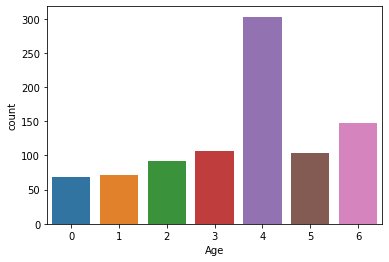

In [33]:
sns.countplot(x='Age',data=df1)

In [34]:
for i in range(0,891):
    if (df1['Fare'][i]<= 8):
        df1['Fare'][i] = 0
    elif (df1['Fare'][i] <= 14):
        df1['Fare'][i] = 1
    elif (df1['Fare'][i] <= 30):
        df1['Fare'][i] = 2
    elif (df1['Fare'][i] <= 50):
        df1['Fare'][i] = 3
    elif (df1['Fare'][i] <= 70):
        df1['Fare'][i] = 4
    else:
        df1['Age'][i] = 5

C:\Users\Rohaan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rohaan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Rohaan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

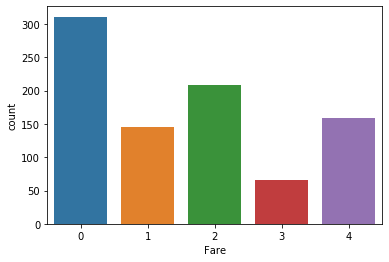

In [35]:
sns.countplot(x='Fare',data=df1)

In [36]:
df1

,Survived,Pclass,Age,Fare,male,Q,S,Relatives
0,0,3,2,0,1,0,1,1
1,1,1,5,4,0,0,0,1
2,1,3,3,0,0,0,1,0
3,1,1,5,4,0,0,1,1
4,0,3,5,0,1,0,1,0
...,...,...,...,...,...,...,...,...
886,0,2,3,1,1,0,1,0
887,1,1,2,2,0,0,1,0
888,0,3,4,2,0,0,1,3
889,1,1,3,2,1,0,0,0


### 6. Defining and Spliting Data into X and Y

In [37]:
from sklearn.model_selection import train_test_split

#Split the data into independent 'X' and dependent 'Y' variables
X = df1.iloc[:, 1:7].values 
Y = df1.iloc[:, 0].values

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=0)

In [38]:
train_X

array([[3, 4, 0, 1, 0, 1],
       [3, 1, 0, 0, 0, 1],
       [3, 4, 2, 1, 0, 1],
       ...,
       [3, 4, 0, 1, 1, 0],
       [3, 5, 2, 0, 0, 1],
       [2, 6, 3, 1, 0, 1]], dtype=int64)

In [39]:
train_Y

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [40]:
train_X.shape

(668, 6)

In [41]:
train_Y.shape

(668,)

In [42]:
test_X

array([[3, 4, 1, 1, 0, 0],
       [3, 4, 0, 1, 0, 1],
       [3, 0, 2, 1, 1, 0],
       ...,
       [3, 2, 0, 1, 0, 1],
       [1, 2, 4, 0, 0, 0],
       [3, 0, 2, 0, 0, 1]], dtype=int64)

In [43]:
test_Y

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1], dtype=int64)

In [44]:
test_X.shape

(223, 6)

In [45]:
test_Y.shape

(223,)

## 7.Building and Evaluating the model

### A.Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
pred_Y_lr=lr.predict(test_X)
pred_Y_lr

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

#### Model Evaluation:

In [48]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,pred_Y_lr))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       139
           1       0.73      0.74      0.73        84

    accuracy                           0.80       223
   macro avg       0.78      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



### B.KNearestNeighbours

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_X, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
pred_Y_knn=knn.predict(test_X)
pred_Y_knn

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0], dtype=int64)

#### Model Evaluation:

In [51]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,pred_Y_knn))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       139
           1       0.75      0.65      0.70        84

    accuracy                           0.79       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.79      0.79      0.79       223



### C.Desicion Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(train_X, train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
pred_Y_dt=tree.predict(test_X)
pred_Y_dt

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0], dtype=int64)

#### Model Evaluation:

In [54]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,pred_Y_dt))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       139
           1       0.81      0.68      0.74        84

    accuracy                           0.82       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.82      0.82      0.82       223



### D.Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 0)
forest.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [56]:
pred_Y_rf=forest.predict(test_X)
pred_Y_rf

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

#### Model Evaluation:

In [57]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,pred_Y_rf))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       139
           1       0.82      0.69      0.75        84

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223



### E.Heirarchial Clustering

In [58]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering()
hc.fit(train_X, train_Y)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [59]:
pred_Y_hc = hc.fit_predict(test_X)

In [60]:
pred_Y_hc

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1], dtype=int64)

#### Model Evaluation:

In [61]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,pred_Y_hc))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68       139
           1       0.35      0.23      0.28        84

    accuracy                           0.55       223
   macro avg       0.48      0.49      0.48       223
weighted avg       0.52      0.55      0.52       223



## 8.Conclusion:

from this project we accomplish the following:
1. Importing csv data into python
2. Detecting Null values in the Dataset and dropping unnecessary columns
3. Detection and successful handling of outlier values in columns Age, Fare
4. Converting continuous variables to categorical variables
5. Creating dummy values for categorical variables
6. Defining and Spliting X and Y to train and test sets
7. Building machine learning models using train sets and predicting values on test set
8. Comparing predicted values to actual test set values to Evaluate accuracy of various Models

# We built the following models on our data and the respective evaluated accuracy is as below:

## 1.Logistic Regression : 80% accuracy

## 2.KNearestNeighbours : 79% accuracy

## 3.Decision Tree : 82% accuracy

## 4.Random Forest : 83% accuracy

## 5.Heirarchial Cluster : 55% accuracy

# Thus highest Accuracy is given by Random Forest Model